In [1]:
import pickle
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import scienceplots
from tqdm import tqdm
from shapely import LineString, Point
from seaborn import displot, histplot, relplot
plt.style.use(['seaborn-v0_8-paper'])
# plt.style.use(['ieee', 'notebook'])

from waymo_devkit.conflict import Conflict

# load all the conflict with PET <= 15s
with open('./pkl/conflict_pet15s.pkl', 'rb') as file:
    conflict_list_from_pickle = pickle.load(file)
print(f"#Conflicts: {len(conflict_list_from_pickle)}")

# convert the conflict dict into conflict object
# then, save them into a list
conflict_list = list()
for c in conflict_list_from_pickle:
    conflict_list.append(
        Conflict(
            leader_id=c['leader_id'],
            leader_index=c['leader_index'],
            leader_states=c['leader_states'],
            leader_time_at_conflict=c['leader_time_at_conflict'],
            follower_id=c['follower_id'],
            follower_index=c['follower_index'],
            follower_states=c['follower_states'],
            follower_time_at_conflict=c['follower_time_at_conflict'],
            PET=c['PET'],
            conflict_type=c['conflict_type'],
            leader_is_av=c['leader_is_av'],
            follower_is_av=c['follower_is_av'],
            center=c['center'],
            radius=c['radius']
    ))
assert len(conflict_list) == len(conflict_list_from_pickle)

#Conflicts: 889


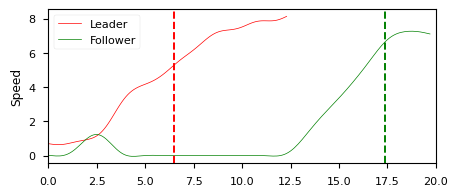

In [2]:
c = conflict_list[10]
c.plot_speed_profile()

In [4]:
# assert c.leader_traj_timestamp.shape[0] == c.leader_traj.shape[0]
# assert c.follower_traj_timestamp.shape[0] == c.follower_traj.shape[0]

# leader_index_in_intersection = list()
# follower_index_in_intersection = list()

# for index, t in enumerate(c.leader_traj_timestamp):
#     coord_t = c.leader_traj[index,:]
#     if np.isnan(coord_t[0]) or np.isnan(coord_t[1]): 
#         pass
#     else:
#         if Point((coord_t[0], coord_t[1])).within(intersection_area):
#             leader_index_in_intersection.append(index)  

# for index, t in enumerate(c.follower_traj_timestamp):
#     coord_t = c.follower_traj[index,:]
#     if np.isnan(coord_t[0]) or np.isnan(coord_t[1]): 
#         pass
#     else:
#         if Point((coord_t[0], coord_t[1])).within(intersection_area):
#             follower_index_in_intersection.append(index)  

# c.leader_traj = c.leader_traj[leader_index_in_intersection,:]
# c.leader_traj_speed = c.leader_traj_speed[leader_index_in_intersection]
# c.leader_traj_timestamp = c.leader_traj_timestamp[leader_index_in_intersection]